## Observations and Insights 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_and_mouse_original=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
study_and_mouse_original



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [115]:
# Checking the number of mice.
number_of_mice = study_and_mouse_original['Mouse ID'].nunique()
number_of_mice


249

In [116]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= study_and_mouse_original[study_and_mouse_original.duplicated()]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_and_mouse_working=study_and_mouse_original.drop_duplicates(keep="first")
study_and_mouse_working

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [118]:
# Checking the number of mice in the clean DataFrame.
study_and_mouse_working["Mouse ID"].nunique()


249

## Summary Statistics

In [119]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# # Assemble the resulting series into a single summary dataframe.

sm_gbo=study_and_mouse_working.groupby('Drug Regimen')

sm_stats_df=pd.DataFrame({"Tumor Volume Mean":sm_gbo["Tumor Volume (mm3)"].mean(),
        "Tumor Volume Median":sm_gbo["Tumor Volume (mm3)"].median(),
        "Tumor Volume Variance":sm_gbo["Tumor Volume (mm3)"].var(),
        "Tumor Volume StDev":sm_gbo["Tumor Volume (mm3)"].std(),
        "Tumor Volume SEM":sm_gbo["Tumor Volume (mm3)"].sem()
})

sm_stats_df




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [120]:
# # Using the aggregation method, produce the same summary statistics in a single line
stat_gbo_agg=(sm_gbo["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']))
stat_gbo_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

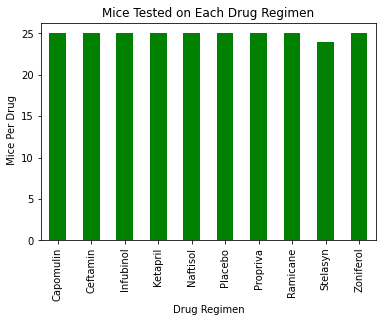

In [121]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#preping the data
mice_per_drug=study_and_mouse_original.groupby('Drug Regimen')[['Mouse ID']].nunique()
mice_per_drug = mice_per_drug.rename(columns={'Mouse ID':'Mice Per Drug'})

#plotting the data
mice_per_drug_p_plot=mice_per_drug.plot(kind="bar",title='Mice Tested on Each Drug Regimen',legend=False,color="green")
mice_per_drug_p_plot.set_ylabel(' Mice Per Drug')
mice_per_drug_p_plot

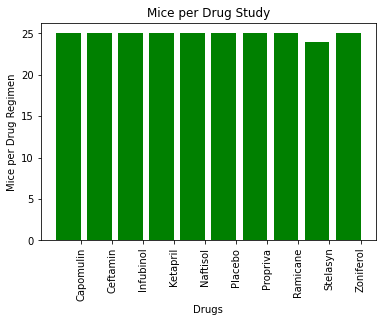

In [122]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#
#prepping the data
x_range = np.arange(len(mice_per_drug["Mice Per Drug"]))
plt.bar(mice_per_drug.index,mice_per_drug["Mice Per Drug"],color="green")
tick_locations = [value+0.4 for value in x_range]

#plotting the data
plt.xticks(tick_locations,mice_per_drug.index,rotation='vertical')
plt.xlabel('Drugs')
plt.ylabel('Mice per Drug Regimen')
plt.title("Mice per Drug Study")
plt.show()



([<matplotlib.patches.Wedge at 0x1a758b2ecc0>,
 [Text(0.021916657774508554, 1.099781642014448, ''),
  Text(-0.021916760743497157, -1.0997816399624576, '')])

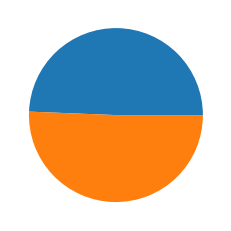

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_gbo=study_and_mouse_working.groupby("Sex")[['Mouse ID']].count()

plt.pie(gender_gbo)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A758B207B8>],
      dtype=object)

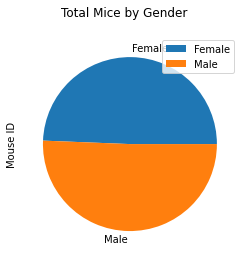

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#need to figure out how to remove "Mouse ID" from the graph
sex_gbo=study_and_mouse_working.groupby("Sex")[['Mouse ID']].count()
sex_pie=sex_gbo.plot(kind="pie",subplots="True",title=("Total Mice by Gender"))

sex_pie


## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [126]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [128]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [130]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
